# Define the Environment

In [1]:
import numpy as np

class ENVIREMENT:
  def __init__(self,sigma=2,actions=10):
    self.miu=np.arange(1,1+actions)
    self.sigma=sigma

  def step(self,action):
    return np.random.randn()*self.sigma+self.miu[action]

## Plot the action rewards

average reward of action 0 : 0.9805935420320933
average reward of action 1 : 2.03923764453964
average reward of action 2 : 3.0131174425027685
average reward of action 3 : 3.9986837747501847
average reward of action 4 : 4.986220838419296
average reward of action 5 : 6.064540024907638
average reward of action 6 : 6.913917693527646
average reward of action 7 : 8.148237840380263
average reward of action 8 : 9.031321785225849
average reward of action 9 : 10.021476883479174


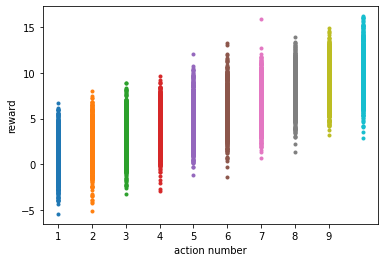

In [2]:
actions = 10
env = ENVIREMENT(actions=actions,sigma=2)

trials=1000

import matplotlib.pyplot as plt

plt.figure()
plt.xticks(range(actions))
for i in range(actions):
  res=[]
  for j in range(trials):
    res.append(env.step(i))
  
  print('average reward of action {} : {}'.format(i,sum(res)/len(res)))
  plt.plot([i+1 for j in range(trials)],res,'.')

plt.xlabel('action number')
plt.ylabel('reward')
plt.show()

# Simple Bandit Algorithm

In [3]:
def Epsilon_Greedy(epsilon,Q):
  best_action = np.argmax(Q)
  random_action = np.random.choice(range(len(Q)))

  random = np.random.rand()

  if random<epsilon:
    return random_action
  else:
    return best_action


Q values :  [0.6807979906534065, 2.2724561851939686, 3.088201329645782, 4.150560735275737, 4.813717140874653, 6.012949544778422, 6.745068908606653, 8.016563773108535, 9.04425069758981, 10.016032632762597]
N values :  [103, 108, 108, 88, 110, 118, 90, 107, 99, 9069]


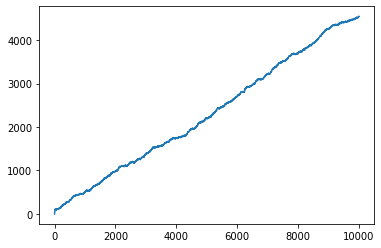

In [4]:
def Simple_Bandit(epsilon,steps):
  Q=[0 for i in range(actions)]
  N=[0 for i in range(actions)]

  Rewards = []
  Regret = [0]

  for s in range(steps):
    selected_action = Epsilon_Greedy(epsilon,Q)
    reward = env.step(selected_action)

    Rewards.append(reward)
    
    regret = Regret[-1] + (actions - reward)
    Regret.append(regret)

    N[selected_action] = N[selected_action]+1
    Q[selected_action] = Q[selected_action]+(reward-Q[selected_action])/N[selected_action]
  
  return Regret,Rewards,N,Q


steps = 10000
actions = 10
env = ENVIREMENT(actions=actions)
epsilon = 0.1

Regret,Rewards,N,Q = Simple_Bandit(epsilon,steps)
plt.plot(Regret)
print('Q values : ',Q)
print('N values : ',N)


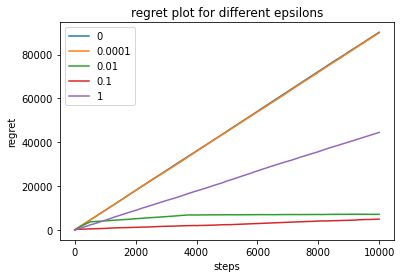

In [9]:
steps = 10000
actions = 10
env = ENVIREMENT(actions=actions)

plt.figure(10)
for epsilon in [0,1e-4,1e-2,1e-1,1]:
  Regret,Rewards,N,Q = Simple_Bandit(epsilon,steps)
  plt.plot(Regret,label='{}'.format(epsilon))

plt.xlabel('steps')
plt.ylabel('regret')
plt.title(('regret plot for different epsilons'))
plt.legend()


# Softmax Algorithm

try to implement

# UCB1 algorithm

try to implement